In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [3]:
stat_df = pd.read_csv('stat_RQ_best_start_no_bound.csv')
stat_df.head()

,quantile,model,method,trial,loss,hit_rate_in,hit_rate_out,dq_in,dq_out,binom_in,binom_out,traffic_in,traffic_out,kupiec_in,kupiec_out,independent_in,independent_out
0,0.05,adaptive,numeric,0,0.128174,0.048515,0.044932,0.618006,0.998819,0.708729,0.360869,green,green,0.325765,0.687559,0.507619,0.96109
1,0.05,adaptive,numeric,1,0.128174,0.048515,0.044932,0.618009,0.998819,0.708729,0.360869,green,green,0.325765,0.687559,0.507619,0.96109
2,0.05,adaptive,numeric,2,0.128174,0.048515,0.044932,0.618005,0.998819,0.708729,0.360869,green,green,0.325765,0.687559,0.507619,0.96109
3,0.05,adaptive,numeric,3,0.128174,0.048515,0.044932,0.618007,0.998819,0.708729,0.360869,green,green,0.325765,0.687559,0.507619,0.96109
4,0.05,adaptive,numeric,4,0.128174,0.048515,0.044932,0.618007,0.998819,0.708729,0.360869,green,green,0.325765,0.687559,0.507619,0.96109


In [6]:
(stat_df[['kupiec_in', 'kupiec_out']] < 0.05).value_counts()

kupiec_in  kupiec_out
False      False         196
True       False          44
dtype: int64

In [7]:
beta_df = pd.read_csv('beta_RQ_best_start_no_bound.csv')
beta_df

,beta,coefficient,S.E. of beta,pval of beta,quantile,model,method,trial
0,beta1,-0.655156,0.041276,4.904719e-57,0.05,adaptive,numeric,0
1,beta1,-0.655151,0.041270,4.736265e-57,0.05,adaptive,numeric,1
2,beta1,-0.655157,0.041278,4.959023e-57,0.05,adaptive,numeric,2
3,beta1,-0.655155,0.041275,4.892247e-57,0.05,adaptive,numeric,3
4,beta1,-0.655155,0.041275,4.892371e-57,0.05,adaptive,numeric,4
...,...,...,...,...,...,...,...,...
655,beta2,0.860597,0.057832,2.191653e-50,0.01,igarch,numeric,28
656,beta3,0.681374,0.474111,7.533604e-02,0.01,igarch,numeric,28
657,beta1,0.295248,0.069707,1.139875e-05,0.01,igarch,numeric,29
658,beta2,0.864063,0.025772,9.785161e-247,0.01,igarch,numeric,29


In [15]:
beta_df[beta_df['coefficient']>-1]

,beta,coefficient,S.E. of beta,pval of beta,quantile,model,method,trial
0,beta1,-0.655156,0.041276,4.904719e-57,0.05,adaptive,numeric,0
1,beta1,-0.655151,0.041270,4.736265e-57,0.05,adaptive,numeric,1
2,beta1,-0.655157,0.041278,4.959023e-57,0.05,adaptive,numeric,2
3,beta1,-0.655155,0.041275,4.892247e-57,0.05,adaptive,numeric,3
4,beta1,-0.655155,0.041275,4.892371e-57,0.05,adaptive,numeric,4
...,...,...,...,...,...,...,...,...
655,beta2,0.860597,0.057832,2.191653e-50,0.01,igarch,numeric,28
656,beta3,0.681374,0.474111,7.533604e-02,0.01,igarch,numeric,28
657,beta1,0.295248,0.069707,1.139875e-05,0.01,igarch,numeric,29
658,beta2,0.864063,0.025772,9.785161e-247,0.01,igarch,numeric,29


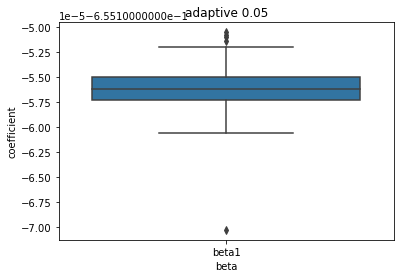

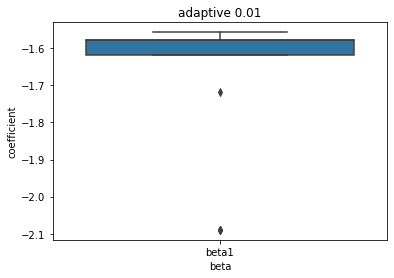

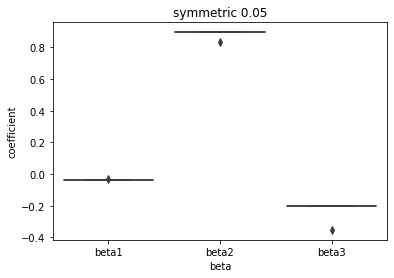

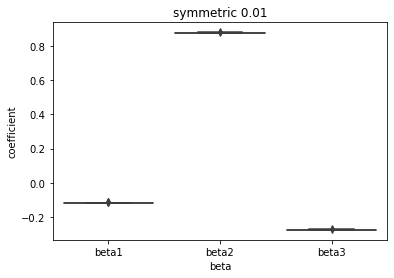

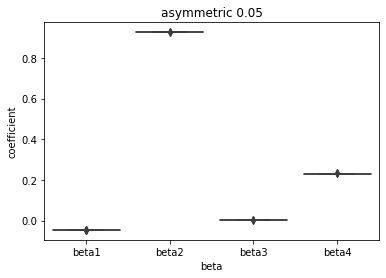

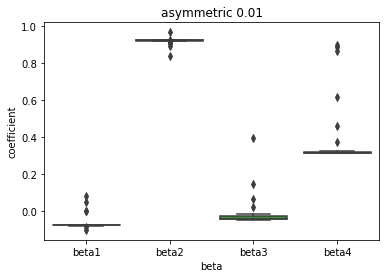

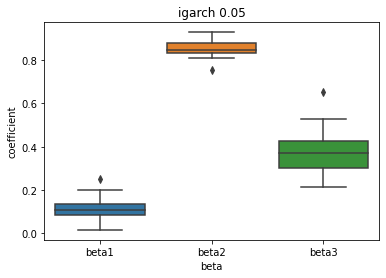

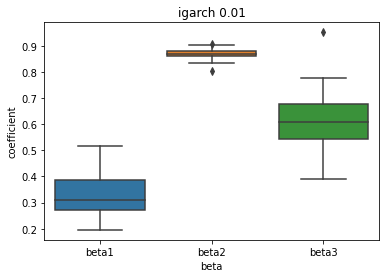

In [11]:
for mod in beta_df['model'].unique():
    for q in beta_df['quantile'].unique():
        cond1 = beta_df['model']==mod
        cond2 = beta_df['quantile']==q
        plt.figure()
        plt.title(f'{mod} {q}')
        sns.boxplot(data=beta_df[cond1&cond2], x='beta', y='coefficient')
        plt.show()